This notebook is to build the models for Hou et al 2011 and model based on discussions with supervisors which is based on a more bottom up aproach compared to traditional OGMs. 

In [1]:
## imports
import Functions as F
import scipy as sc

# Hou et al 2011 Model
 The Hou et al 2011 model needs to be rearranged so as it can be used for my purposes.  I need to express the model in terms of $\frac{dm}{dt}$.
## Rearranging in  terms of $\frac{dm}{dt}$
Hou et al. state that:
\begin{align}
    E_m \frac{dm}{dt} = B_0 m^\frac{3}{4} - B_m m 
\end{align}
where:
- $E_m$ : the amount of metabolic energy required to synthesize one unit of biomass
- $B_0$ : Taxon specific constant = $b_0 e^{-\frac{E_0}{KT}}$ (Boltzmann-Arrhenius equation)
- $B_m$ : mass specific metabolic rate = $B_0 M^{-\frac{1}{4}}$


When trying to calculate feeding restricted growth (FR) for a proportion of *ad libitum* growth $\beta$:
\begin{align}
    \beta [(f + \frac{E_c}{E_m}) B_0 m(t)^{\frac{3}{4}} - \frac{E_c}{E_m} B_0 M^{- \frac{1}{4}} m(t)] = f B_{0, FR}m_{FR}(t)^\frac{3}{4} + E_c \frac{dm_{FR}(t)}{dt} \\
    \beta [(f + \frac{E_c}{E_m}) B_0 m(t)^{\frac{3}{4}} - \frac{E_c}{E_m} B_0 M^{- \frac{1}{4}} m(t)] - f B_{0, FR}m_{FR}(t)^\frac{3}{4} &=  E_c \frac{dm_{FR}(t)}{dt}\\
        \frac{\beta [(f + \frac{E_c}{E_m}) B_0 m(t)^{\frac{3}{4}} - \frac{E_c}{E_m} B_0 M^{- \frac{1}{4}} m(t)] - f B_{0, FR}m_{FR}(t)^\frac{3}{4}}{E_c} &=  \frac{dm_{FR}(t)}{dt}\\
\end{align}

Where:
- $E_c$ : the combustion energy of a cell

To calculate $m(t)$ to insert into the above equation:
\begin{align}
   m(t) &= (1 - [1 - (\frac{m_0}{M})^\frac{1}{4}] e^{-\frac{B_{0t}}{4 E_m M^\frac{1}{4}}})^4 M\\
\end{align}

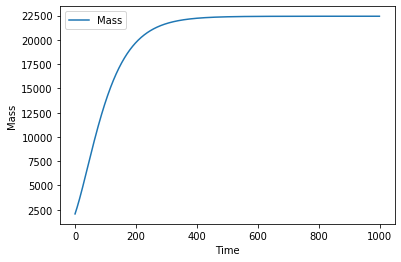

[  2063.           2157.75071903   2254.19716564   2352.29237633
   2451.98900645   2553.23935969   2655.99549673   2760.20929137
   2865.83250296   2972.81684694   3081.11403166   3190.67583338
   3301.45419776   3413.40122952   3526.46924357   3640.61083905
   3755.77892842   3871.92678232   3989.00806391   4106.97686724
   4225.78774454   4345.39573824   4465.7564076    4586.82587091
   4708.56082001   4830.91851904   4953.85684201   5077.33427944
   5201.30999163   5325.74379442   5450.5961623    5575.82825781
   5701.40194797   5827.2797937    5953.42506486   6079.801753
   6206.37456836   6333.10894466   6459.97104765   6586.92777372
   6713.94674859   6840.99633065   6968.04561268   7095.06441481
   7222.02328466   7348.89349995   7475.64705737   7602.25666926
   7728.69575863   7854.93845793   7980.95960877   8106.73474595
   8232.24009598   8357.45257158   8482.34975493   8606.90989468
   8731.11190493   8854.93535448   8978.36045858   9101.36805886
   9223.93962619   9346.057

In [2]:
# a section to test functions and other functionality
#dog
m0 = 2063
time = 10**3
params = {"beta":0.75, "f":1.8, "Ec":24000, "Em":4185, "B0":3920, "B0FR":3920 * 1.04,  "M":34805}
mass = F.hou_integrate(m0=m0, time=time, params=params)[:,0] # using mice from hou et al 2011
# may want to define B0 and B0FR based on b0 and calculate in function?
F.plot_hou(m0, time, params)
print(mass)

## Direct Calculation of dm/dt
- Since the growth above is too slow I check whether it could an issue with the way feeding restricted is calculated from *ad libitum*

\begin{align}
    


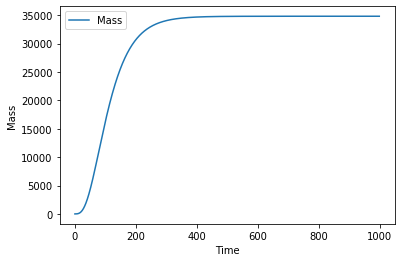

[  1.00000000e-01   3.79648688e-01   1.01523506e+00   2.20734382e+00
   4.18574700e+00   7.20247663e+00   1.15257213e+01   1.74344692e+01
   2.52138278e+01   3.51509545e+01   4.75315391e+01   6.26367846e+01
   8.07408351e+01   1.02108607e+02   1.26993980e+02   1.55638311e+02
   1.88269240e+02   2.25099748e+02   2.66327443e+02   3.12134052e+02
   3.62685089e+02   4.18129680e+02   4.78600523e+02   5.44213970e+02
   6.15070212e+02   6.91253552e+02   7.72832752e+02   8.59861449e+02
   9.52378618e+02   1.05040909e+03   1.15396407e+03   1.26304178e+03
   1.37762795e+03   1.49769652e+03   1.62321022e+03   1.75412120e+03
   1.89037163e+03   2.03189439e+03   2.17861362e+03   2.33044536e+03
   2.48729814e+03   2.64907358e+03   2.81566694e+03   2.98696768e+03
   3.16286003e+03   3.34322346e+03   3.52793321e+03   3.71686078e+03
   3.90987437e+03   4.10683934e+03   4.30761861e+03   4.51207312e+03
   4.72006214e+03   4.93144368e+03   5.14607483e+03   5.36381207e+03
   5.58451159e+03   5.80802958e+03

In [3]:
## Looking at just reproducing growth using Hou et al 2011
m0 = 0.1
time = 10**3
params = {"B0" : 3920, "Em" : 4185, "M" : 34805}

print(F.plot_hou_simple(m0, time, params))



## checking B0
In the above calculations I have taken B0 to be 3.9$W/Kg$, which is the average for mammals (Hou et al 2008)

Below will look at calculating exact values following the equations laid out in Hou et al 2011 (basically Boltzmann-Arrhenius equations).

\begin{align}
    B_0 = b_0 e ^{\frac{E_0}{KT}}
\end{align}
Where:
- $b_0$ : taxon specific constant
- $E_0 \approx 0.65 eV$ : average activation energy
- $T$ : temperature in Kelvin
- $K = 8.62 \times 10^{-5}$: Bolzmann's constant

# Bottom Up Supply Model
A bottom up supply model that uses a functional response scaled by an allocation constraint to define the gain term.

## Simplified Model
\begin{align}
    \frac{1}{m} \frac{dm}{dt} &= Gain - Loss \\
    \frac{1}{m} \frac{dm}{dt} &= \epsilon f(\cdot) - (L_B + L_R) \\
\end{align}
where:
- $\epsilon$ : allocation constraint (efficiency of conversion from food to energy), dimensionless
- $mf\cdot$ : consumption (intake) rate, mass\time
- $L_B$ : Maintenance cost ($\propto$ Resting metabolic rate),  \rate (mass specific)
- $L_R$ : reproductive cost, rate (mass specific)

## Functional Response
\begin{align}
    f(\cdot) &= \frac{a R(t)}{1 + ahR(t)} \\
\end{align}
where:
- $a$ : Search rate, area or volume/time
- $R(t)$ :  Resource Density at time t, mass/area (time dependent)
- $h$ : Handling time

\begin{align}
    f(\cdot)_{lim_{R \to \infty}} &= \frac{1}{h} \\
     \text{at } \textit{ad libitum} \text{ resource availibility} & \text{ consumption is limited by handling time}\\
\end{align}

## Gain
Gain should scale with $m^\frac{3}{4}$
- to accomplish this it needs to be multiplied by $m^{-\frac{1}{4}}$ to accomadate for when m is multiplied through for all LHS terms in dmdt.

## Loss 
Loss, for the moment at least is assumed to scale isometrically. So no manipulation like in gain is needed. <-- incorrect

- loss should scale the same way as gain since it is mass specific?

It seems RMR is reported in energy/mass/time e.g. $J/g/h$.
- For my purposes it need to be a rate (/time) so as when $m$ is multiplied through it yields mass/time.  
## Data
-  resting metabolic rate (RMR) = 2.2 $J/g/h$ (Grantner 1998, refered to as SMR)

## Testing
### No fluctuation in R(t)

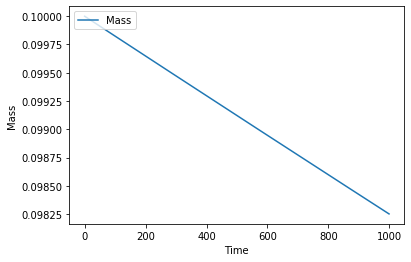

[ 0.1         0.09999824  0.09999647  0.09999471  0.09999294  0.09999118
  0.09998941  0.09998765  0.09998588  0.09998412  0.09998235  0.09998059
  0.09997882  0.09997706  0.0999753   0.09997353  0.09997177  0.09997
  0.09996824  0.09996647  0.09996471  0.09996295  0.09996118  0.09995942
  0.09995765  0.09995589  0.09995412  0.09995236  0.0999506   0.09994883
  0.09994707  0.0999453   0.09994354  0.09994178  0.09994001  0.09993825
  0.09993649  0.09993472  0.09993296  0.09993119  0.09992943  0.09992767
  0.0999259   0.09992414  0.09992238  0.09992061  0.09991885  0.09991709
  0.09991532  0.09991356  0.0999118   0.09991003  0.09990827  0.09990651
  0.09990474  0.09990298  0.09990122  0.09989945  0.09989769  0.09989593
  0.09989416  0.0998924   0.09989064  0.09988887  0.09988711  0.09988535
  0.09988358  0.09988182  0.09988006  0.0998783   0.09987653  0.09987477
  0.09987301  0.09987124  0.09986948  0.09986772  0.09986596  0.09986419
  0.09986243  0.09986067  0.09985891  0.09985714  0.09

In [5]:
#params from pawar et al 2012 SI : Salmo trutta [juvenile] → Gammarus sp. [dead adult] 
# params = {"epsilon" : 1, "L_B" : 0, "L_R" : 0, "a" : 2.25*10**-2, "R" : 3.81*10**-5, "h" : 1.22*10**2} # L_B as B0 from hou

params = {"epsilon" : 1, "L_B" : 10**-4.7, "L_R" : 0, "a0" : 1.08*10**-2, 
          "R" : 1.2*10**-3, "h" : 2.57, "amp" : 0, "period" : 1}
m0 = 0.1
time = 10**3

mass = F.plot_supply(m0, time, params)


print(mass)

### Adding Fluctuation for R(t)
#### Different periods and amplitudes

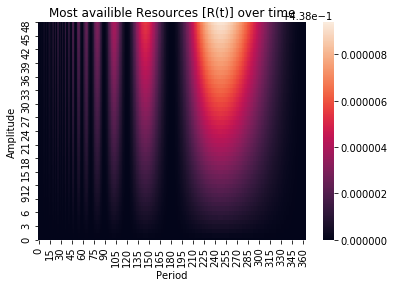

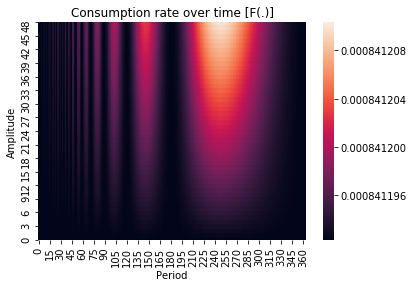

In [81]:
import Functions as F
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sb
resource = 1.2*10**-3
days = 365
period = sc.arange(1, days, 1)
amp = sc.linspace(0, resource/10000, 50) # use linspace here since i dont know what the resource value looks like yet
time = sc.arange(0, days, 1)
period, amp = sc.meshgrid(period, amp)

R_t = sc.zeros_like(amp)

for t in time:
    R_t = R_t + F.Rt(t, amp, period, resource)
    
# # plt.xlabel("")
# # sb.heatmap(fun(x,y), xticklabels = 10, yticklabels= 10).invert_yaxis()
sb.heatmap(R_t).invert_yaxis()
plt.title("Most availible Resources [R(t)] over time")
plt.xlabel("Period")
plt.ylabel("Amplitude")
plt.show()
FuncResp = sc.zeros_like(amp)

for t in time:
    FuncResp = F.Fun_Resp(m = 0.1, a0 = 1.08*10**-2, R = F.Rt(t, amp, period, centre = resource), h = 2.57) + FuncResp

sb.heatmap(FuncResp).invert_yaxis()
plt.title("Consumption rate over time [F(.)]")
plt.xlabel("Period")
plt.ylabel("Amplitude")
plt.show()



In [68]:
FuncResp

array([[ 0.00084119,  0.00084119,  0.00084119, ...,  0.00084119,
         0.00084119,  0.00084119],
       [ 0.00084119,  0.00084119,  0.00084123, ...,  0.00084119,
         0.00084119,  0.00084119],
       [ 0.00084119,  0.00084119,  0.00084127, ...,  0.0008412 ,
         0.00084119,  0.00084119],
       ..., 
       [ 0.00084119,  0.00084119,  0.0008431 , ...,  0.00084131,
         0.00084123,  0.00084119],
       [ 0.00084119,  0.00084119,  0.00084315, ...,  0.00084131,
         0.00084123,  0.00084119],
       [ 0.00084119,  0.00084119,  0.00084319, ...,  0.00084131,
         0.00084123,  0.00084119]])

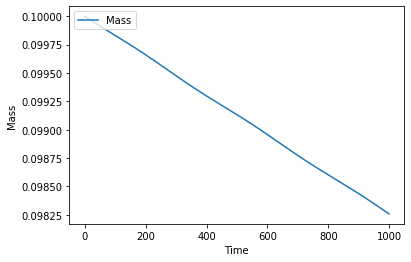

[ 0.1         0.09999824  0.09999647  0.09999471  0.09999296  0.0999912
  0.09998945  0.0999877   0.09998595  0.0999842   0.09998245  0.09998071
  0.09997897  0.09997723  0.09997549  0.09997375  0.09997202  0.09997029
  0.09996856  0.09996683  0.0999651   0.09996338  0.09996165  0.09995993
  0.09995821  0.0999565   0.09995478  0.09995307  0.09995136  0.09994965
  0.09994794  0.09994623  0.09994453  0.09994282  0.09994112  0.09993942
  0.09993772  0.09993603  0.09993433  0.09993264  0.09993095  0.09992926
  0.09992757  0.09992588  0.0999242   0.09992251  0.09992083  0.09991915
  0.09991747  0.09991579  0.09991412  0.09991244  0.09991077  0.09990909
  0.09990742  0.09990575  0.09990408  0.09990241  0.09990075  0.09989908
  0.09989742  0.09989575  0.09989409  0.09989243  0.09989077  0.09988911
  0.09988745  0.09988579  0.09988413  0.09988247  0.09988082  0.09987916
  0.09987751  0.09987585  0.0998742   0.09987255  0.0998709   0.09986924
  0.09986759  0.09986594  0.09986429  0.09986264  0.

In [8]:
params = {"epsilon" : 1, "L_B" : 10**-4.7, "L_R" : 0, "a0" : 1.08*10**-2, 
          "R" : 1.2*10**-3, "h" : 2.57, "amp" : 0.5*(1.2*10**-3), "period" : 365}
time = 10**3

mass = F.plot_supply(m0, time, params)

print(mass)

# To do List
- Resource fluctuation
    - heatmap for amplitude vs frequency of the resource fluctuation
- scaling for as mass specific search rate 
    - similar for $L_B$
    
- get mass specific search rate from dim paper

# Testing 

In [ ]:
# testing a sin wave function
import Functions as F
import scipy as sc
import matplotlib.pyplot as plt
def Rt(t, amp, period, centre):
    """
    period is the period of the wave in days
    centre is the value the wave will oscilate around
    amp is amplitude
    t is the number of days, should essentailly reset to 1 when it is 1 day over the period
    """
    x = t * (2 * sc.pi / period) 
    return amp * sc.sin(freq * x) + centre


t = sc.arange(0, 700, 1)
Rts = []
for i in t:
    Rts.append(Rt(t=i, amp=2, freq=2, centre=1, period=365))
    
plt.figure()
plt.plot(t, Rts)
plt.show()

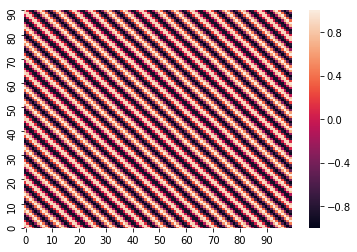

In [20]:
# heatmap testing

import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sb
res = 100
x = sc.arange(0, res, 1)
y = sc.arange(0, res, 1)

x,y = sc.meshgrid(x,y)

def fun(x,y):
    return sc.sin(x + y)

plt.xlabel("x")
sb.heatmap(fun(x,y), xticklabels = 10, yticklabels= 10).invert_yaxis()